In [8]:
from matplotlib import image as img

In [21]:
import cv2

In [23]:
resImages = []
for i in imagelist:
    resI = cv2.resize(i, dsize=(128,128))
    resImages.append(resI)

In [76]:
imageLoc = []
direct = []
for source, dirs, files in os.walk("C:\\Users\\Julie Redmond\\Linnaeus 5 256X256\\256x256\\test"):
    for file in files:
        imageLoc.append(os.path.join(source, file))
        if "berry" in source:
            direct.append(0)
        if "bird" in source:
            direct.append(1)
        if "dog" in source:
            direct.append(2)
        if "flower" in source:
            direct.append(3)
        if "other" in source:
            direct.append(4)

In [78]:
imageList=[]
for file in imageLoc:
    imge = cv2.imread(file)
    imageList.append(imge)

In [79]:
resImages = []
for i in imageList:
    resI = cv2.resize(i, dsize=(128,128))
    resImages.append(resI)

In [80]:
import numpy as np
hiRes= np.array(imageList)
lowRes=np.array(resImages)

In [81]:
cat = np.array(direct)

In [83]:
np.save("hiResTest.npy", hiRes)
np.save("lowResTest.npy", lowRes)
np.save("categoriesTest.npy", direct)

In [68]:
testNP = np.load("testnp.npy")

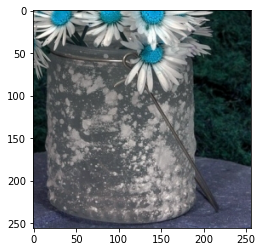

In [71]:
plt.imshow(testNP[4700])

In [61]:
import matplotlib.pyplot as plt

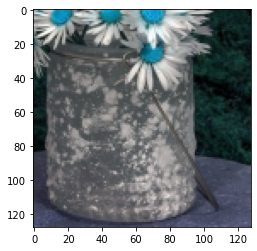

In [63]:
plt.imshow(resImages[4700])

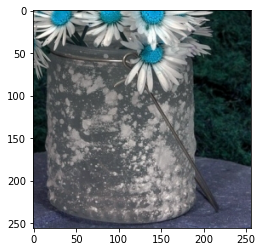

In [64]:
plt.imshow(imagelist[4700])    

In [35]:
from tensorflow import keras as k
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models

In [36]:
network = models.Sequential()
network.add(layers.Conv2D(64,(5,5), activation="relu", padding='same', input_shape=(128,128,3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(128,(4,4), activation="relu", padding='same'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(256,(4,4), activation="relu", padding='same'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dense(5, activation = "softmax"))

In [37]:
#image + feature detection + classification = important output factors.
#First classify the image, obviously through the features found. Then using the imput and classification,
#Classification nodes for each feature.
#connect that to fully connected layers while grabbing information from the features and feature locations.
#input + first layer of features = correct size, then that + next input = correct size, then that + final = correct size.
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       131200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       524544    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

In [10]:
imgType = ".jpg"
folPath = "C:\\Users\\Julie Redmond\\Linnaeus 5 256X256\\128x128\\train\\"

In [64]:
for r in range(len(resImages)):
    temp = fileList[r]
    temp = temp.replace("_256","_128")
    cv2.imwrite(temp,resImages[r])

In [25]:
imageLoc[0]

'C:\\Users\\Julie Redmond\\Linnaeus 5 256X256\\train\\berry\\1000_256.jpg'

In [26]:
temp = imageLoc[0]

In [27]:
temp

'C:\\Users\\Julie Redmond\\Linnaeus 5 256X256\\train\\berry\\1000_256.jpg'

In [28]:
temp.replace("_256","_128")

'C:\\Users\\Julie Redmond\\Linnaeus 5 256X256\\train\\berry\\1000_128.jpg'

In [29]:
temp

'C:\\Users\\Julie Redmond\\Linnaeus 5 256X256\\train\\berry\\1000_256.jpg'

In [36]:
range(len(resImages))

range(0, 6000)

In [45]:
dirs

[]

In [50]:
imageLoc[0]

'C:\\Users\\Julie Redmond\\Linnaeus 5 256X256\\train\\berry\\1000_256.jpg'

In [51]:
os.chdir("C:\\Users\\Julie Redmond\\Linnaeus 5 256X256\\train\\")

In [60]:
fileList = []

In [62]:
len(fileList)

6000

In [66]:
imageInputs = k.Input(shape=(128,128,3,))

In [84]:
dirTest[5000]

['C:\\Users\\Julie Redmond\\Linnaeus 5 256X256\\256x256\\train\\other',
 '1181_256.jpg']

In [33]:
direct[4700]

3

In [41]:
import numpy as np

In [42]:
train_images=np.array(resImages)

In [43]:
train_images.shape

(6000, 128, 128, 3)

In [44]:
train_lables = np.array(direct)

In [48]:
train_lables.shape

(6000, 5)

In [47]:
train_lables = k.utils.to_categorical(train_lables)

In [50]:
norm_train_images=train_images/255

In [51]:
norm_train_images.shape

(6000, 128, 128, 3)

In [52]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [53]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       131200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       524544    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

In [56]:
network.fit(train_images, train_lables, batch_size = 50, epochs = 50)

Epoch 1/50
 52/120 [============>.................] - ETA: 5:03 - loss: 14.0984 - accuracy: 0.2265

KeyboardInterrupt: 